<a href="https://colab.research.google.com/github/t-czank/ciTeamTest/blob/main/env_test_sample_Comic_%E8%A6%96%E8%81%B4sample_mark_20250430.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ＊What is this



# ＊DATASET準備

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## BQ DATASET準備

- connent to BQ
- get data schema

In [ ]:
# pip install --upgrade 'google-cloud-bigquery[bqstorage,pandas]'

In [ ]:
# Enable data table display
# Colab includes the google.colab.data_table package that can be used to display large pandas dataframes as an interactive data table.
%load_ext google.colab.data_table
%load_ext google.cloud.bigquery

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table
The google.cloud.bigquery extension is already loaded. To reload it, use:
  %reload_ext google.cloud.bigquery


# ＊Demo 本文👇


# test_001


In [ ]:
# %%bigquery --project un-ds-dwh
%%bigquery fact_book_view --project un-ds-dwh


SELECT
    column_name
    ,data_type

FROM
  `un-ds-dwh.dwh.INFORMATION_SCHEMA.COLUMNS`

WHERE
  table_name = 'fact_book_view';

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
# fact_book_view_today
fact_book_view

,column_name,data_type
0,user_platform_id,STRING
1,user_multi_account_id,STRING
2,uuid,STRING
3,os,STRING
4,os_version,STRING
5,app_version,STRING
6,user_agent,STRING
7,service_platform,STRING
8,product_public_code,STRING
9,book_public_code,STRING


In [ ]:
# %%bigquery --project un-ds-dwh
%%bigquery dim_book --project un-ds-dwh


SELECT
    column_name
    ,data_type

FROM
  `un-ds-dwh`.`staging`.`INFORMATION_SCHEMA.COLUMNS`

WHERE
  table_name = 'dim_book';

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
dim_book

,column_name,data_type
0,book_public_code,STRING
1,book_name,STRING
2,book_no,INT64
3,media_type_code,STRING
4,book_rating_code,STRING
5,original_sales_date,DATETIME
6,min_sale_start_datetime,DATETIME
7,max_sale_end_datetime,DATETIME
8,has_sample,INT64
9,is_app_block,INT64


In [ ]:
# %%bigquery --project un-ds-dwh
%%bigquery pen_name --project un-ds-dwh


SELECT
    column_name
    ,data_type

FROM
  `un-ds-dwh`.`de_cdc`.`INFORMATION_SCHEMA.COLUMNS`

WHERE
  table_name = 'cmsdb-pen_name';

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
pen_name

,column_name,data_type
0,PEN_NAME_ID,INT64
1,PEN_NAME_PUBLIC_CODE,STRING
2,PERSON_ID,INT64
3,PEN_NAME,STRING
4,NORMALIZE_PEN_NAME,STRING
5,PEN_NAME_KANA,STRING
6,NORMALIZE_PEN_NAME_KANA,STRING
7,POPULARITY_POINT,INT64
8,REGISTER_DATETIME,TIMESTAMP
9,REGISTER_TRACE,STRING


In [ ]:
%%bigquery --project un-ds-dwh
# %%bigquery dim_book --project un-ds-dwh


SELECT
    book_author_type.book_author_type_name

FROM `un-ds-dwh.de_cdc.cmsdb-book_sakuhin` AS book

LEFT JOIN `un-ds-dwh.de_cdc.cmsdb-book` AS book_table
    ON book.book_sakuhin_id = book_table.book_sakuhin_id -- 結合キー: book_sakuhin_id

LEFT JOIN `un-ds-dwh.de_cdc.cmsdb-book_credit` AS book_credit
    ON book_table.book_id = book_credit.book_id -- 結合キー: book_id

LEFT JOIN `un-ds-dwh.de_cdc.cmsdb-pen_name` AS pen_name
    ON book_credit.pen_name_id = pen_name.pen_name_id -- 結合キー: pen_name_id

LEFT JOIN `un-ds-dwh.de_cdc.cmsdb-book_author_type` AS book_author_type
    ON book_credit.book_author_type_id = book_author_type.book_author_type_id -- 結合キー: book_author_type_id

WHERE
    book_table.media_type_code = 'COMIC'

GROUP BY 1

Query is running:   0%|          |

Downloading:   0%|          |

,book_author_type_name
0,その他
1,作
2,画
3,著・デザイン
4,監修
...,...
670,キャラクター原案・監修
671,トリック原案
672,アニメーションキャラクター原案
673,潤色・脚本


In [ ]:
%%bigquery --project un-ds-dwh
# %%bigquery dim_book --project un-ds-dwh


SELECT
    book.book_sakuhin_public_code,
    pen_name.pen_name,
    pen_name.NORMALIZE_PEN_NAME,
    book_author_type.book_author_type_name

FROM `un-ds-dwh.de_cdc.cmsdb-book_sakuhin` AS book

LEFT JOIN `un-ds-dwh.de_cdc.cmsdb-book` AS book_table
    ON book.book_sakuhin_id = book_table.book_sakuhin_id -- 結合キー: book_sakuhin_id

LEFT JOIN `un-ds-dwh.de_cdc.cmsdb-book_credit` AS book_credit
    ON book_table.book_id = book_credit.book_id -- 結合キー: book_id

LEFT JOIN `un-ds-dwh.de_cdc.cmsdb-pen_name` AS pen_name
    ON book_credit.pen_name_id = pen_name.pen_name_id -- 結合キー: pen_name_id

LEFT JOIN `un-ds-dwh.de_cdc.cmsdb-book_author_type` AS book_author_type
    ON book_credit.book_author_type_id = book_author_type.book_author_type_id -- 結合キー: book_author_type_id

WHERE
    book_author_type.book_author_type_name in ('著者','原作')
    and book_table.media_type_code = 'COMIC'

GROUP BY 1,2,3,4

limit 99

Query is running:   0%|          |

Downloading:   0%|          |

,book_sakuhin_public_code,pen_name,NORMALIZE_PEN_NAME,book_author_type_name
0,BSD0000913687,占地,占地,著者
1,BSD0000881915,加瀬アオ,加瀬アオ,著者
2,BSD0000891531,脊髄引き抜きの刑,脊髄引き抜きの刑,原作
3,BSD0000900734,小田ひで次,小田ひで次,著者
4,BSD0000949739,八木ちあき,八木ちあき,著者
...,...,...,...,...
94,BSD0000893197,寺井赤音,寺井赤音,著者
95,BSD0000893195,オオイシヒロト,オオイシヒロト,著者
96,BSD0000893184,入江喜和,入江喜和,著者
97,BSD0000893187,ろびこ,ろびこ,著者


In [ ]:
%%bigquery  --project un-ds-dwh --params {'start_date': '2025-04-01','end_date': '2025-04-07', 'limit': 999}


SELECT
    t2.book_sakuhin_public_code,
    t2.book_sakuhin_name,
    COUNT(DISTINCT uuid) AS uu,
    SUM(COUNT(DISTINCT uuid)) OVER () AS total_uu,
    RANK() OVER (ORDER BY COUNT(DISTINCT t1.uuid) DESC) AS rank_uu,

    COUNT(*) AS view_cnt,
    SUM(COUNT(*)) OVER () AS total_view_cnt,
    RANK() OVER (ORDER BY COUNT(*) DESC) AS rank_view_cnt


FROM
    # `un-ds-dwh`.`dwh`.`fact_book_view_today` AS t1
    `un-ds-dwh`.`dwh`.`fact_book_view` AS t1

INNER JOIN
    `un-ds-dwh`.`staging`.`dim_book` AS t2
    ON t1.book_sakuhin_public_code = t2.book_sakuhin_public_code

WHERE
    t2.media_type_code = 'COMIC'
    and view_start_time >= @start_date
    and view_start_time < @end_date

GROUP BY
  1,
  2

order by 3 desc

limit @limit

Query is running:   0%|          |

Downloading:   0%|          |

,book_sakuhin_public_code,book_sakuhin_name,uu,total_uu,rank_uu,view_cnt,total_view_cnt,rank_view_cnt
0,BSD0000722100,小悪魔教師サイコ,12524,956820,1,5631120,441343294,11
1,BSD0000353109,俺だけレベルアップな件,11834,956820,2,1319040,441343294,42
2,BSD0000028107,ONE PIECE モノクロ版,11122,956820,3,8145088,441343294,8
3,BSD0000507515,片田舎のおっさん、剣聖になる～ただの田舎の剣術師範だったのに、大成した弟子たちが俺を放ってく...,7500,956820,4,259462,441343294,180
4,BSD0000192711,薬屋のひとりごと,7173,956820,5,540210,441343294,101
...,...,...,...,...,...,...,...,...
994,BSD0000537194,義妹生活,161,956820,993,2905,441343294,4515
995,BSD0000497084,BLEACH 獄頤鳴鳴篇,161,956820,993,314,441343294,11249
996,BSD0000910211,逃げれば、逃げるほどに,160,956820,997,48822,441343294,732
997,BSD0000036633,クロサギ,160,956820,997,35240,441343294,929


In [ ]:
# %%bigquery df_001 --project un-ds-dwh --params {'start_date': '2025-04-01','end_date': '2025-04-03', 'limit': 999}

%%bigquery df_001 --project un-ds-dwh --params {'start_date': '2025-04-01','end_date': '2025-05-01', 'limit': 999}


with
    t0 as (
        SELECT
            t2.book_sakuhin_public_code,
            t2.book_sakuhin_name,
            COUNT(DISTINCT uuid) AS uu,
            SUM(COUNT(DISTINCT uuid)) OVER () AS total_uu,
            RANK() OVER (ORDER BY COUNT(DISTINCT t1.uuid) DESC) AS rank_uu

        FROM
            # `un-ds-dwh`.`dwh`.`fact_book_view_today` AS t1
            `un-ds-dwh`.`dwh`.`fact_book_view` AS t1

        INNER JOIN
            `un-ds-dwh`.`staging`.`dim_book` AS t2
            ON t1.book_sakuhin_public_code = t2.book_sakuhin_public_code

        WHERE
            t2.media_type_code = 'COMIC'
            and view_start_time >= @start_date
            and view_start_time < @end_date

        GROUP BY 1,2
    )

    ,book_author as (
        SELECT
            book_sakuhin_public_code,
            TO_JSON_STRING(ARRAY_AGG(STRUCT(book_author_type_name,NORMALIZE_PEN_NAME))) AS authors_info

        from (
            SELECT
                book.book_sakuhin_public_code,
                pen_name.NORMALIZE_PEN_NAME,
                book_author_type.book_author_type_name

            FROM `un-ds-dwh.de_cdc.cmsdb-book_sakuhin` AS book

            inner JOIN `un-ds-dwh.de_cdc.cmsdb-book` AS book_table
                ON book.book_sakuhin_id = book_table.book_sakuhin_id -- 結合キー: book_sakuhin_id

            inner JOIN `un-ds-dwh.de_cdc.cmsdb-book_credit` AS book_credit
                ON book_table.book_id = book_credit.book_id -- 結合キー: book_id

            inner JOIN `un-ds-dwh.de_cdc.cmsdb-pen_name` AS pen_name
                ON book_credit.pen_name_id = pen_name.pen_name_id -- 結合キー: pen_name_id

            inner JOIN `un-ds-dwh.de_cdc.cmsdb-book_author_type` AS book_author_type
                ON book_credit.book_author_type_id = book_author_type.book_author_type_id -- 結合キー: book_author_type_id

            WHERE
                book_author_type.book_author_type_name in ('著者','原作')
                and book_table.media_type_code = 'COMIC'

            GROUP BY 1,2,3
        )

        GROUP BY 1
    )



select
    t0.*
    ,book_author.authors_info
    ,SUM(uu) OVER (ORDER by rank_uu asc) AS running_sum_uu

    ,uu/total_uu as percentage_per_title
    ,SUM(uu) OVER (ORDER by rank_uu asc) / total_uu as cumulative_percentage_per_title

from t0

left join book_author
    on t0.book_sakuhin_public_code = book_author.book_sakuhin_public_code

order by rank_uu asc

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
df_001.head(10)

,book_sakuhin_public_code,book_sakuhin_name,uu,total_uu,rank_uu,authors_info,running_sum_uu,percentage_per_title,cumulative_percentage_per_title
0,BSD0000722100,小悪魔教師サイコ,24748,3544768,1,"[{""book_author_type_name"":""原作"",""NORMALIZE_PEN_...",24748,0.006982,0.006982
1,BSD0000028107,ONE PIECE モノクロ版,23176,3544768,2,"[{""book_author_type_name"":""著者"",""NORMALIZE_PEN_...",47924,0.006538,0.013520
2,BSD0000353109,俺だけレベルアップな件,22156,3544768,3,"[{""book_author_type_name"":""原作"",""NORMALIZE_PEN_...",70080,0.006250,0.019770
3,BSD0000507515,片田舎のおっさん、剣聖になる～ただの田舎の剣術師範だったのに、大成した弟子たちが俺を放ってく...,21849,3544768,4,"[{""book_author_type_name"":""原作"",""NORMALIZE_PEN_...",91929,0.006164,0.025934
4,BSD0000525022,金色のガッシュ！！ 2【単話版】,18829,3544768,5,"[{""book_author_type_name"":""著者"",""NORMALIZE_PEN_...",110758,0.005312,0.031245
5,BSD0000192711,薬屋のひとりごと,18755,3544768,6,"[{""book_author_type_name"":""原作"",""NORMALIZE_PEN_...",129513,0.005291,0.036536
6,BSD0000027810,キングダム,15799,3544768,7,"[{""book_author_type_name"":""著者"",""NORMALIZE_PEN_...",145312,0.004457,0.040993
7,BSD0000868770,恋愛レベル99の男、落とします,13898,3544768,8,"[{""book_author_type_name"":""原作"",""NORMALIZE_PEN_...",159210,0.003921,0.044914
8,BSD0000386857,葬送のフリーレン,13199,3544768,9,"[{""book_author_type_name"":""原作"",""NORMALIZE_PEN_...",172409,0.003724,0.048638
9,BSD0000217756,呪術廻戦,12295,3544768,10,"[{""book_author_type_name"":""著者"",""NORMALIZE_PEN_...",184704,0.003468,0.052106


In [ ]:
df_001.describe()

,uu,total_uu,rank_uu,running_sum_uu,percentage_per_title,cumulative_percentage_per_title
count,80541.0,80541.0,80541.0,80541.0,8.054100e+04,80541.000000
mean,44.011969,3544768.0,35836.130592,3338156.778821,1.241604e-05,0.941714
std,314.503737,0.0,18749.578371,386481.085101,8.872336e-05,0.109029
min,0.0,3544768.0,1.0,24748.0,0.000000e+00,0.006982
25%,1.0,3544768.0,19618.0,3328609.0,2.821059e-07,0.939020
50%,4.0,3544768.0,36870.0,3482650.0,1.128424e-06,0.982476
75%,15.0,3544768.0,57976.0,3544768.0,4.231589e-06,1.000000
max,24748.0,3544768.0,80541.0,3544768.0,6.981557e-03,1.000000


<Axes: xlabel='rank_uu'>

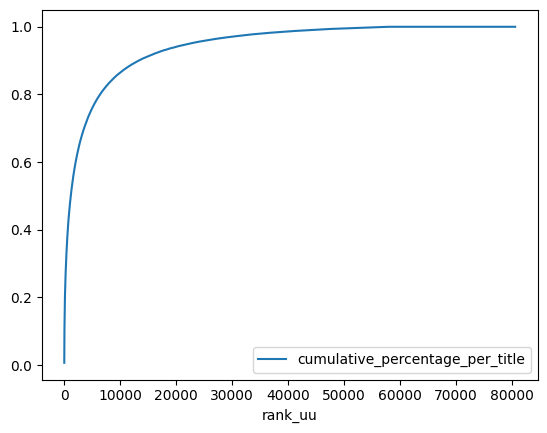

In [ ]:
# prompt: Using dataframe df_001: plot cumulative_percentage_per_title　by rank_uu

# Plot cumulative_percentage_per_title by rank_uu
df_001.plot(x='rank_uu', y='cumulative_percentage_per_title')

In [ ]:
# # prompt: Using dataframe df_001: download df_001 as csv

# df_001.to_csv('Comic_視聴sample-mark-20250501.csv', index=False)